Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


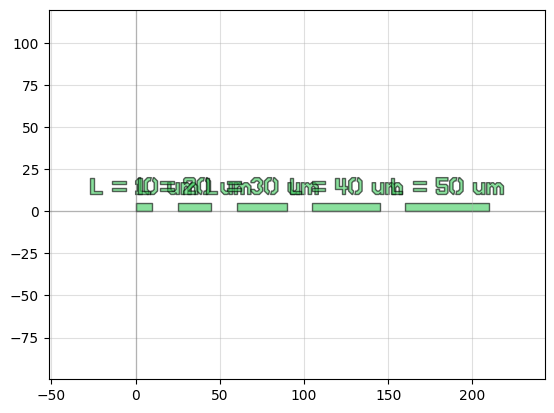

パラメータスイープのGDSファイル './output/rectangle_sweep.gds' を生成しました。


In [4]:
import phidl.geometry as pg
import phidl.device_layout as pd
from phidl import quickplot as qp

# 1. パラメータを持つコンポーネント関数を作成
def create_rectangle(length, width=5):
    """指定された長さと幅の長方形デバイスを作成する関数"""
    # phidl.geometry の rectangle 関数で長方形を生成
    D = pg.rectangle(size=(length, width))
    # デバイスに名前をつけておくと管理がしやすい
    D.name = f"rect_L{length}_W{width}"
    return D

# --- メインの処理 ---

# 2. スイープしたい値のリストを定義
lengths_to_sweep = [10, 20, 30, 40, 50]
spacing = 15  # 各長方形の間隔

# 3. 全てのデバイスを配置するための、親となるメインデバイスを作成
D_sweep = pd.Device("Rectangle_Length_Sweep")

current_x = 0  # 最初の長方形を配置するX座標

# forループでリスト内の各lengthについて処理を実行
for length in lengths_to_sweep:
    # 現在の長さで長方形のデバイスを生成
    rect = create_rectangle(length=length)
    
    # メインデバイスに参照(ref)として追加し、配置する
    rect_ref = D_sweep.add_ref(rect)
    rect_ref.movex(current_x)
    
    # 4. (推奨) パラメータ値を記したラベルを追加
    label = pg.text(f"L = {length} um")
    label_ref = D_sweep.add_ref(label)
    
    # 長方形の上部にラベルを配置
    # アンカーポイントを使って中央揃えにすると簡単
    label_ref.center = (rect_ref.center[0], rect_ref.ymax + 10)
    
    # 次の長方形を配置するためにX座標を更新
    current_x += length + spacing

# 結果をGDSファイルとして保存
D_sweep.write_gds("./output/rectangle_sweep.gds")

# Jupyter Notebookなどでは、以下のコマンドでレイアウトを可視化できます
qp(D_sweep)

print("パラメータスイープのGDSファイル './output/rectangle_sweep.gds' を生成しました。")